Upgrade pip installer to match python version

In [1]:
%pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Installing all necessary packages


In [2]:
%pip install sklearn
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install nflfastpy
%pip install statsmodels

%pip install nfl_data_py
%pip install seaborn
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated pa

In [3]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import brier_score_loss
from xgboost import XGBClassifier

In [1]:
pbp = nfl.import_pbp_data([2022, 2023])

NameError: name 'nfl' is not defined

In [4]:
pbp.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type
0,1.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,None,None,None,...,,,0.0,0.0,NaN,NaN,NaN,None,None,None
1,43.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,00-0036157;00-0035202;00-0037984;00-0029597;00...,00-0035537;00-0032134;00-0034419;00-0036500;00...,11.0,11.0,NaN,NaN,NaN,None,None,None
2,68.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,00-0036924;00-0032466;00-0036979;00-0032234;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11.0,11.0,NaN,NaN,NaN,None,None,None
3,89.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,00-0036924;00-0032466;00-0032234;00-0036979;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11.0,11.0,0.56,3.07,1.0,ANGLE,ZONE_COVERAGE,COVER_2
4,115.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,00-0036924;00-0032466;00-0036979;00-0032234;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11.0,11.0,NaN,NaN,NaN,None,None,None


In [5]:
print(pbp.shape)
pbp_clean = pbp[(pbp['pass'] == 1) & (pbp['play_type'] != "no_play")]
print(pbp_clean.shape)

(99605, 390)
(43076, 390)


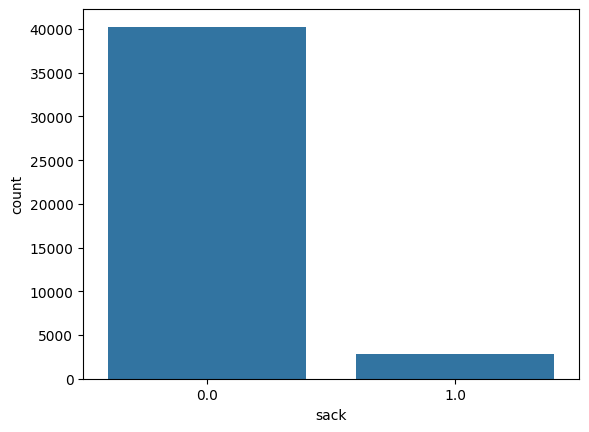

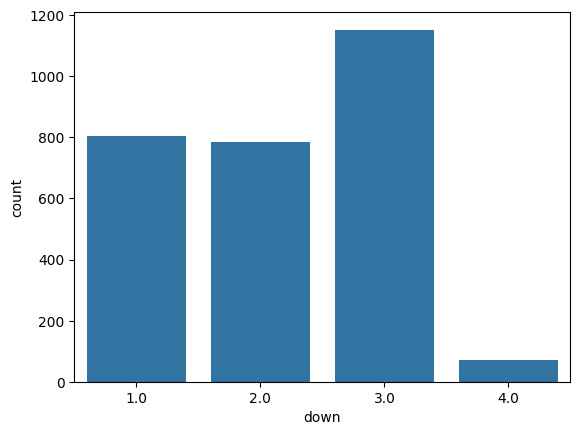

In [6]:
sns.countplot(x=pbp_clean["sack"])
plt.show()
sacks = pbp_clean[(pbp_clean['sack'] == 1)]
sns.countplot(x=sacks["down"])
plt.show()

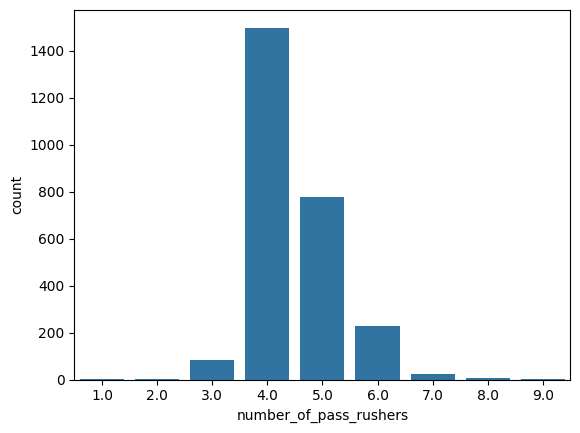

In [7]:
sacks = pbp_clean[(pbp_clean['sack'] == 1)]
sns.countplot(x=sacks["number_of_pass_rushers"])
plt.show()

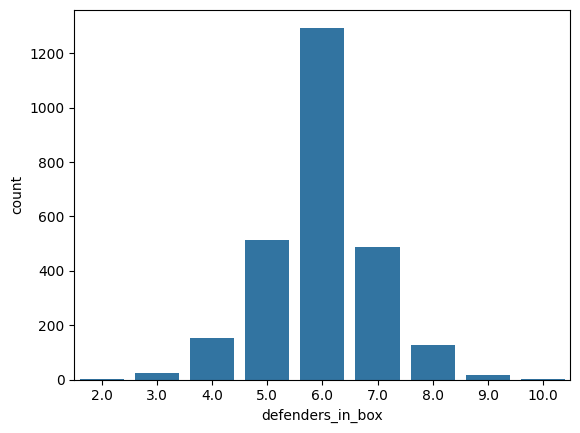

In [13]:
sacks = pbp_clean[(pbp_clean['sack'] == 1)]
sns.countplot(x=sacks["defenders_in_box"])
plt.show()

In [8]:
pbp_clean.loc[:, 'obvious_pass'] = np.where((pbp_clean['down'] == 3) & (pbp_clean['ydstogo'] >= 6), 1,0)

/var/folders/n6/fctsvhx51zv2t2mnhw79_mxh0000gn/T/ipykernel_82483/1064845038.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pbp_clean.loc[:, 'obvious_pass'] = np.where((pbp_clean['down'] == 3) & (pbp_clean['ydstogo'] >= 6), 1,0)
/var/folders/n6/fctsvhx51zv2t2mnhw79_mxh0000gn/T/ipykernel_82483/1064845038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbp_clean.loc[:, 'obvious_pass'] = np.where((pbp_clean['down'] == 3) & (pbp_clean['ydstogo'] >= 6), 1,0)


In [9]:
pre_df = pbp_clean[['game_id', 'play_id', 'season', 'name', 'down', 'ydstogo', 'yardline_100', 'game_seconds_remaining',
                    'defenders_in_box', 'number_of_pass_rushers', 'xpass', 'obvious_pass', 'sack']]
df = pre_df.dropna()
df.isna().sum()

game_id                   0
play_id                   0
season                    0
name                      0
down                      0
ydstogo                   0
yardline_100              0
game_seconds_remaining    0
defenders_in_box          0
number_of_pass_rushers    0
xpass                     0
obvious_pass              0
sack                      0
dtype: int64

In [10]:
df.head()

,game_id,play_id,season,name,down,ydstogo,yardline_100,game_seconds_remaining,defenders_in_box,number_of_pass_rushers,xpass,obvious_pass,sack
3,2022_01_BAL_NYJ,89.0,2022,J.Flacco,1.0,10.0,59.0,3569.0,6.0,4.0,0.389904,0,0.0
5,2022_01_BAL_NYJ,136.0,2022,J.Flacco,3.0,5.0,54.0,3541.0,7.0,4.0,0.963242,0,0.0
7,2022_01_BAL_NYJ,202.0,2022,L.Jackson,1.0,10.0,72.0,3522.0,7.0,4.0,0.479318,0,0.0
8,2022_01_BAL_NYJ,230.0,2022,L.Jackson,2.0,6.0,68.0,3501.0,6.0,3.0,0.608057,0,0.0
11,2022_01_BAL_NYJ,301.0,2022,L.Jackson,2.0,10.0,60.0,3379.0,5.0,4.0,0.565180,0,0.0


In [11]:
df.loc[:, 'down'] = df['down'].astype('category')
df_no_ids = df.drop(columns = ['game_id', 'play_id', 'name', 'season'])
df_no_ids = pd.get_dummies(df_no_ids, columns = ['down'])

In [14]:
df_no_ids.columns

Index(['ydstogo', 'yardline_100', 'game_seconds_remaining', 'defenders_in_box',
       'number_of_pass_rushers', 'xpass', 'obvious_pass', 'sack', 'down_1.0',
       'down_2.0', 'down_3.0', 'down_4.0'],
      dtype='object')

In [15]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in sss.split(df_no_ids, df_no_ids['sack']):
    strat_train_set = df_no_ids.iloc[train_index]
    strat_test_set = df_no_ids.iloc[test_index]

X_train = strat_train_set.drop(columns = ['sack'])
Y_train = strat_train_set['sack']
X_test = strat_test_set.drop(columns = ['sack'])
Y_test = strat_test_set['sack']

In [16]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, Y_train)

LR_pred = pd.DataFrame(LR.predict_proba(X_test), columns = ['no_sack', 'sack'])[['sack']]

print('Brier Score: ', brier_score_loss(Y_test, LR_pred))


Brier Score:  0.061011750839351314


In [17]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)

RF_pred = pd.DataFrame(RF.predict_proba(X_test), columns = ['no_sack', 'sack'])[['sack']]

print('Brier Score: ', brier_score_loss(Y_test, RF_pred))

Brier Score:  0.06545143611711005


In [18]:
XGB = XGBClassifier(objective="binary:logistic", random_state=42)
XGB.fit(X_train, Y_train)

XGB_pred = pd.DataFrame(XGB.predict_proba(X_test), columns = ['no_sack', 'sack'])[['sack']]

print('Brier Score: ', brier_score_loss(Y_test, XGB_pred))

Brier Score:  0.06342947451855119


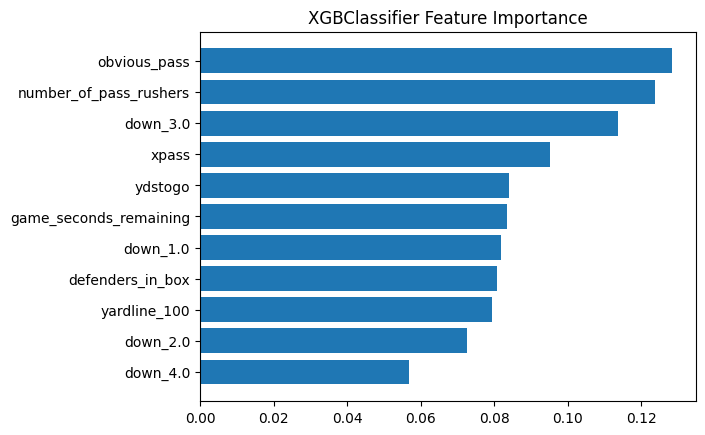

In [19]:
sorted_idx = XGB.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], XGB.feature_importances_[sorted_idx])
plt.title("XGBClassifier Feature Importance")
plt.show()

In [21]:
data_for_prediction = df_no_ids.drop('sack', axis = 1)

XGB_predictions = pd.DataFrame(XGB.predict_proba(data_for_prediction), columns = ['no_sack_probability', 'sack_probability'])[['sack_probability']]

original_data_with_predictions = df.reset_index().drop(columns = ['index'])
original_data_with_predictions['sack_probability'] = XGB_predictions

original_data_with_predictions['sacks_over_under'] = original_data_with_predictions['sack'] - original_data_with_predictions['sack_probability']

summary_2023 = original_data_with_predictions[(original_data_with_predictions['season'] == 2023)].groupby('name').agg({'sack': 'sum', 'sack_probability': 'sum', 'sacks_over_under': 'sum'}).reset_index().sort_values('sacks_over_under', ascending = True)

print(summary_2023)

             name  sack  sack_probability  sacks_over_under
41        J.Allen  23.0         40.303146        -17.303146
56         J.Love  28.0         41.981991        -13.981991
80      P.Mahomes  27.0         40.220711        -13.220710
72     M.Stafford  28.0         37.336536         -9.336535
98   T.Tagovailoa  27.0         34.568363         -7.568362
..            ...   ...               ...               ...
10        B.Young  51.0         39.497818         11.502182
101      Z.Wilson  46.0         33.434971         12.565028
26        D.Jones  30.0         15.801968         14.198032
91       T.DeVito  36.0         19.137865         16.862135
86       S.Howell  59.0         40.192719         18.807280

[102 rows x 4 columns]


In [22]:
summary_2023 = original_data_with_predictions[(original_data_with_predictions['season'] == 2023)].groupby('name').agg({'sack': 'sum', 'sack_probability': 'sum', 'sacks_over_under': 'sum'}).reset_index().sort_values('sack_probability', ascending = False)

print(summary_2023)

            name  sack  sack_probability  sacks_over_under
56        J.Love  28.0         41.981991        -13.981991
50        J.Goff  35.0         41.351940         -6.351941
41       J.Allen  23.0         40.303146        -17.303146
30    D.Prescott  39.0         40.260395         -1.260393
80     P.Mahomes  27.0         40.220711        -13.220710
..           ...   ...               ...               ...
33  D.Singletary   0.0          0.013410         -0.013410
55   J.Jefferson   0.0          0.012746         -0.012746
84    S.Clifford   0.0          0.012335         -0.012335
21    Co.Heyward   0.0          0.011267         -0.011267
59       J.Smith   0.0          0.006960         -0.006960

[102 rows x 4 columns]


In [23]:
summary_2023 = original_data_with_predictions[(original_data_with_predictions['season'] == 2023)].groupby('name').agg({'sack': 'sum', 'sack_probability': 'sum', 'sacks_over_under': 'sum'}).reset_index().sort_values('sack_probability', ascending = False)

summary_2023 = summary_2023.head(20)

print(summary_2023)

             name  sack  sack_probability  sacks_over_under
56         J.Love  28.0         41.981991        -13.981991
50         J.Goff  35.0         41.351940         -6.351941
41        J.Allen  23.0         40.303146        -17.303146
30     D.Prescott  39.0         40.260395         -1.260393
80      P.Mahomes  27.0         40.220711        -13.220710
86       S.Howell  59.0         40.192719         18.807280
67      L.Jackson  43.0         40.120274          2.879727
7      B.Mayfield  41.0         39.674511          1.325488
10        B.Young  51.0         39.497818         11.502182
53        J.Hurts  37.0         38.174889         -1.174887
72     M.Stafford  28.0         37.336536         -9.336535
83       R.Wilson  45.0         35.953365          9.046637
18       C.Stroud  35.0         35.948639         -0.948640
52      J.Herbert  29.0         34.848633         -5.848634
8         B.Purdy  31.0         34.754581         -3.754580
98   T.Tagovailoa  27.0         34.56836

In [1]:
summary_2022 = original_data_with_predictions[(original_data_with_predictions['season'] == 2022)].groupby('name').agg({'sack': 'sum', 'sack_probability': 'sum', 'sacks_over_under': 'sum'}).reset_index().sort_values('sack_probability', ascending = False)

summary_2022 = summary_2022.head(20)

print(summary_2022)

NameError: name 'original_data_with_predictions' is not defined